# programs

In [19]:
# SetUP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

project_path = os.path.join(os.getcwd(), os.path.pardir)
result_path = os.path.join(project_path, 'result')

In [20]:
att1 = pd.read_excel(os.path.join(project_path, 'att1.xlsx'))
att2 = pd.read_excel(os.path.join(project_path, 'att2.xlsx'))
att3 = pd.read_excel(os.path.join(project_path, 'att3.xlsx'))
att4 = pd.read_excel(os.path.join(project_path, 'att4.xlsx'))

In [6]:
print(att1,'\n')
print(att2,'\n')
print(att3,'\n')
print(att4,'\n')

        序号             企业名称 产品通用名称 产品形态   总氮百分比  P2O5百分比  K2O百分比 含氯情况  有机质百分比  \
0        1     安徽中元化肥股份有限公司   复混肥料   颗粒  0.1300   0.1700  0.2000   低氯    0.00   
1        2     安徽中元化肥股份有限公司   复混肥料   颗粒  0.1300   0.1700  0.2000   中氯    0.00   
2        3     安徽中元化肥股份有限公司   复混肥料   颗粒  0.2000   0.1500  0.1600   低氯    0.00   
3        4     安徽中元化肥股份有限公司   复混肥料   颗粒  0.2600   0.1300  0.1200   低氯    0.00   
4        5     安徽中元化肥股份有限公司   复混肥料   颗粒  0.2600   0.1300  0.1200   中氯    0.00   
...    ...              ...    ...  ...     ...      ...     ...  ...     ...   
2920  2921   安徽泰又丰有机肥科技有限公司   有机肥料   粉状  0.0167   0.0167  0.0167   无氯    0.45   
2921  2922  滁州市塔山生物有机肥料有限公司   有机肥料   粉状  0.0167   0.0167  0.0167   无氯    0.45   
2922  2923  利辛县鑫圣农业科技有限责任公司   有机肥料   粉状  0.0167   0.0167  0.0167   无氯    0.45   
2923  2924  利辛县鑫圣农业科技有限责任公司   有机肥料   颗粒  0.0167   0.0167  0.0167   无氯    0.45   
2924  2925     六安亿牛生物科技有限公司   有机肥料   粉状  0.0167   0.0167  0.0167   无氯    0.45   

                正式登记证号     

In [7]:
att1['产品通用名称'].value_counts()

产品通用名称
复混肥料            1647
掺混肥料             941
有机肥料             180
有机-无机复混肥料        124
有机-无机   复混肥料       9
床土调酸剂              7
有机无机    复混肥料       5
稻苗床土调酸剂            3
\n有机肥料\n           3
有机－无机复混肥料          2
有机肥料\n             1
有机肥料               1
有机无机   复混肥料        1
 掺混肥料              1
Name: count, dtype: int64

In [8]:
att4['技术指标'].value_counts()

技术指标
总养分≥35%                                                                                         2
有机质≥60%总养分≥5%                                                                                   2
N+P2O5+K2O≥40%                                                                                  2
N+P2O5+K2O≥35%                                                                                  2
有机质≥50%，总养分≥6%                                                                                  2
                                                                                               ..
N+P2O5+K2O≥40.0%（30-5-5）含氯（中氯）                                                                  1
总养分（（N+P2O5+K2O）≥15.0%(9-4.5-1.5)  水溶性锌≥0.2%                                                    1
N+P2O5+K2O≥7%，有机质≥45% .                                                                         1
有机质的质量分数（以烘干基计），%  ≥45总养分（氮+五氧化二磷+氧化钾）的质量分数（以烘干基计），%  ≥5.0水份（鲜样）的质量分数，%，≤30酸碱度（PH）   5.5-8.5    1
总养分≥25%（N+P2O5+

In [9]:
att2['产品通用名称'].value_counts()

产品通用名称
复混肥料         5954
有机肥料         1045
有机-无机复混肥料     611
床土调酸剂           9
Name: count, dtype: int64

In [7]:
# task 2.1
df = att2[att2['产品通用名称'] == '复混肥料']
# print(df['总无机养分百分比'].unique())
# print(df['总无机养分百分比'].isna().value_counts())
M = np.max(df['总无机养分百分比'])
m = np.min(df['总无机养分百分比'])
print(M, m)

# 观察到无机物含量为 0，
# df['总氮百分比'].value_counts()
# 去除值为零的
# df = df[df['总无机养分百分比'] != 0]
# # print(df['总无机养分百分比'].isna().value_counts())
# M = np.max(df['总无机养分百分比'])
# m = np.min(df['总无机养分百分比'])
# print(M, m)

0.72 0.0


In [8]:
df.loc[:, 'tags'] = (df['总无机养分百分比']-m) / ((M-m+0.01) / 10) + 1
df.loc[:, 'tags'] = df['tags'].astype(int)
df.to_excel(os.path.join(result_path, 'result2_1.xlsx'))
g1 = df['tags'].value_counts().sort_index()
print(g1)

/tmp/ipykernel_26128/147878346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tags'] = (df['总无机养分百分比']-m) / ((M-m+0.01) / 10) + 1


tags
1.0        3
4.0      430
5.0     1097
6.0     1470
7.0     2507
8.0      434
9.0       12
10.0       1
Name: count, dtype: int64


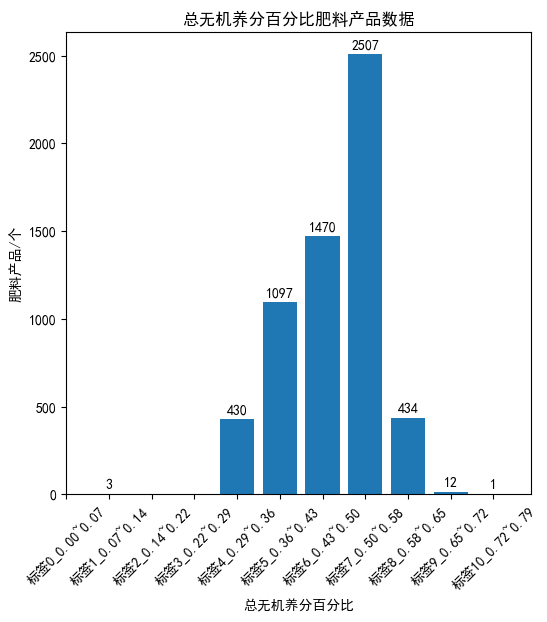

In [9]:
# 画图
x = g1.index
y = g1.values
plt.figure(figsize=(6, 6))
plt.bar(x, y)
strs = []
increment = (M-m)/10
for i in range(0,11,1):
    j = i * increment
    s = '标签%d_%.2f~%.2f'%(i, j, j+increment)
    strs.append(s)
plt.xticks(range(0, 11, 1), strs, rotation=45)
plt.xlabel('总无机养分百分比')

plt.title('总无机养分百分比肥料产品数据')
plt.ylabel('肥料产品/个')

for i in range(len(y)):
    height = y[i] + 30
    plt.text(x[i], height, y[i], ha='center')

plt.savefig(os.path.join(result_path, 'task2_1.png'))
plt.show()

In [127]:
g1.sort_values(inplace=True, ascending=False)
g1

tags
7.0     2507
6.0     1470
5.0     1097
8.0      434
4.0      430
9.0       12
1.0        3
10.0       1
Name: count, dtype: int64

In [141]:
df = att2[att2['产品通用名称'] == '有机肥料']
M = np.max(df['有机质百分比'])
m = np.min(df['有机质百分比'])
print(M, m)

0.9 0.0


In [142]:
# 观察到 45% 有机质含量的化肥数量过少，将其删除
df.loc[:, 't2s'] = (df['有机质百分比']-m) / ((M-m+0.01) / 10) + 1
df.loc[:, 't2s'] = df['t2s'].astype(int)
g1 = df['t2s'].value_counts().sort_index()
g1

/tmp/ipykernel_2796/1620190403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 't2s'] = (df['有机质百分比']-m) / ((M-m+0.01) / 10) + 1


t2s
1.0       8
5.0     857
6.0      46
7.0      97
8.0      27
9.0       7
10.0      3
Name: count, dtype: int64

In [143]:
M = np.max(df['总无机养分百分比'])
m = np.min(df['总无机养分百分比'])
print(M, m)
df.loc[:, 'tags'] = (df['总无机养分百分比']-m) / ((M-m+0.01) / 10) + 1
df.loc[:, 'tags'] = df['tags'].astype(int)
g1 = df['tags'].value_counts().sort_index()
df['tag_tuple'] = list(zip(df['tags'], df['t2s']))
df1 = df.drop(['tags', 't2s'], axis=1)
df1.to_excel(os.path.join(result_path, 'result2_2.xlsx'))

0.43 0.0501


/tmp/ipykernel_2796/379670291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tags'] = (df['总无机养分百分比']-m) / ((M-m+0.01) / 10) + 1
/tmp/ipykernel_2796/379670291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tag_tuple'] = list(zip(df['tags'], df['t2s']))


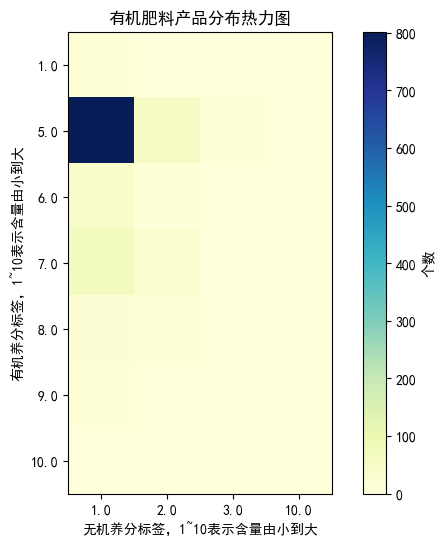

In [149]:
# 创建数据透视表，统计每个坐标的出现次数
pivot_table = df.pivot_table(index='t2s', columns='tags', aggfunc='size', fill_value=0)

# 使用 Matplotlib 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='个数')

# 设置坐标轴标签
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)

plt.title('有机肥料产品分布热力图')
plt.xlabel('无机养分标签，1~10表示含量由小到大')
plt.ylabel('有机养分标签，1~10表示含量由小到大')

plt.savefig(os.path.join(result_path, 'task2_2.png'))
plt.show()

In [150]:
df1['tag_tuple'].value_counts().head(3)

tag_tuple
(1.0, 5.0)    802
(1.0, 7.0)     68
(2.0, 5.0)     50
Name: count, dtype: int64

In [ ]:
# task 2.3


# task 4

In [3]:
# 非结构化数据处理
att4 = att4[att4['技术指标'] != pd.to_datetime('2017-08-15 00:00:00')].reset_index()
metrics = att4['技术指标']
for i in metrics:
    print(i)

总养分（N+P2O5+K2O）≥35%（14-8-13）   硫酸钾型
总养分（N+P2O5+K2O）≥30%（15-6-9）   中氯
N+P2O5+K2O≥5% ,有机质≥45%
总养分(N+P2O5+K2O)≥43％ （10―18―15）含氯（低氯）
总养分(N+P2O5+K2O)≥5.0％ 有机质≥45％ 酸碱度（PH）  5.5∽8.5
总养分(N+P2O5+K2O)≥20％ （10―4―6）有机质≥20％含氯
总养分（N+P2O5+K2O）≥5%，有机质≥45%
N+P2O5+K2O  ≥6%         有机质≥50%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥7%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥7%         有机质≥55%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥9%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥10%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5 +K2O ≥35%  （15-8-12）高氯
N+P2O5+K2O  ≥10%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥11%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5+K2O  ≥12%         有机质≥45%水分≤30%酸碱度（pH）5.5—8.5
N+P2O5 +K2O ≥30%  （12-8-10）高氯
N+P2O5 +K2O ≥30%  （14-7-9）高氯
N+P2O5 +K2O ≥40%  （17-8-15）   硫酸钾型
N+P2O5 +K2O ≥46%  （15-13-18）含氯 （高氯）
N+P2O5+K2O≥30%，（16-6-8），含氯（低氯）
总养分（N+P2O5+K2O）≥5.0%有机质≥45%
有机质的质量分数（以烘干基计），%
N+P2O5+K2O≥5%，有机质≥45%
N+P2O5 +K2O ≥38%  （12-8-18）硫酸钾型
1、养分（N+P2O5+K2O）≥25%2、有机质≥15%
N+P2O5+K2O≥12% 有机质≥

In [21]:
import re
# N,P,K
neurits = r'(\d+)\s*(-|―)\s*(\d+)\s*(-|―)\s*(\d+)'  # 使用捕获组
only_total  = r'总养分.*(≥|≧)\s*(\d+)'
npk = r'N\+P2O5\+K2O.*(≥|≧)\s*(\d+)'

# 有机质含量
compound = r'有机质.*(≥|≧)\s*(\d+)'

# 氯含量
cl = r'\w氯'
cl_high = r'高氯'
cl_low = r'低氯'
cl_mid = r'中氯'

att4['氮含量百分比'] = None
att4['磷含量百分比'] = None
att4['钾含量百分比'] = None
att4['含氯程度'] = None
att4['有机质含量百分比'] = None

# N，P，K 含量
finish_set1 = set()

def addPercent(att4, cnt, n, p, k):
    att4.loc[cnt, '氮含量百分比'] = n
    att4.loc[cnt, '磷含量百分比'] = p
    att4.loc[cnt, '钾含量百分比'] = k

for cnt in range(len(metrics)):
    i = metrics[cnt]

    # 通过 xx-xx-xx
    founds = re.findall(neurits, i)
    if len(founds) == 1:
        for found in founds:
            n, _, p, _, k = found
            addPercent(att4, cnt, format(int(n)/100., '.3f'), format(int(p)/100., '.3f'), format(int(k)/100., '.3f'))
            finish_set1.add(cnt)
        pass
            
    # 通过 ‘总养分’
    founds = re.findall(only_total, i)
    # 已检查过其长度全为 1
    if len(founds) == 1 and cnt not in finish_set1:
        _, found = founds[0]
        num = int(found)
        n, p, k = (format(num/100., '.3f'), format(num/100.,'.3f'), format(num/100.,'.3f'))
        addPercent(att4, cnt, n, p, k)
        finish_set1.add(cnt)
        pass

    # 通过 'N+P2O5+K2O ≥'
    founds = re.findall(npk, i)
    if len(founds) == 1 and cnt not in finish_set1:
        _, found = founds[0]
        num = int(found)
        n, p, k = (format(num/300.,'.3f'), format(num/300.,'.3f'), format(num/300.,'.3f'))
        addPercent(att4, cnt, n, p, k)
        finish_set1.add(cnt)
        pass
# att4[['氮含量百分比', '磷含量百分比', '钾含量百分比']] = att4[['氮含量百分比', '磷含量百分比', '钾含量百分比']].round(3)
# print(att4)
    # 剩余数据手动更新
att4.loc[[30, 31, 34, 91, 92, 123, 133, 151], ['氮含量百分比', '磷含量百分比', '钾含量百分比']] =[[0.100, 0.080,0.120],[0.127,0.127,0.127],[0.017,0.017,0.017],[0.030,0.030,0.030], [0.033,0.062,0.028],
        [0.017,0.017,0.017], [0.100,0.100,0.100], [0.170,0.170,0.170]]

print(att4['氮含量百分比'].isna().value_counts())
not_finished_indices = [i for i in range(len(metrics)) if i not in finish_set1]
for i in not_finished_indices:
    print(att4.loc[i, '技术指标'], f" the place is {i}")


# 有机质含量处理
finish_set2 = set()
for cnt in range(len(metrics)):
    i = metrics[cnt]

    # 通过 xx-xx-xx
    founds = re.findall(compound, i)
    if len(founds) == 1:
        for found in founds:
            _, com = found
            num = format(int(com) / 100., ".3f")
            att4.loc[cnt, '有机质含量百分比'] = num
            finish_set2.add(cnt)
        pass
# 复混肥料有机质含量为 0
for cnt in range(len(metrics)):
    if att4.loc[cnt, '产品通用名称'] == '复混肥料' or att4.loc[cnt, '产品通用名称'] == '掺混肥料':
        att4.loc[cnt, '有机质含量百分比'] = 0.000
        finish_set2.add(cnt)

print(att4['有机质含量百分比'].isna().value_counts())
not_finished_indices1 = [i for i in range(len(metrics)) if i not in finish_set2]
for i in not_finished_indices1:
    print(att4.loc[i, '技术指标'], f" the place is {i}")
# att4[['有机质含量百分比']] = att4[['有机质含量百分比']]
# 剩余数据手动更新
att4.loc[[71, 100], '有机质含量百分比'] = [0.000, 0.600]

# 过滤‘氯’
finish_set3 = set()
for cnt in range(len(metrics)):
    i = metrics[cnt]
    
    # 通过 '氯' 排查无氯
    founds = re.findall(cl, i)
    for found in founds:
        if found == cl_high:
            att4.loc[cnt, '含氯程度'] = cl_high
            finish_set3.add(cnt)
            pass
        else:
            if found == cl_low:
                att4.loc[cnt, '含氯程度'] = cl_low
                finish_set3.add(cnt)
                pass
            else:
                if found == cl_mid:
                    att4.loc[cnt, '含氯程度'] = cl_mid
                    finish_set3.add(cnt)
                    pass
                else:
                    att4.loc[cnt, '含氯程度'] = '低氯'
    if len(founds) == 0:
        att4.loc[cnt, '含氯程度'] = '无氯'

    founds = re.findall('不含氯', i)
    for found in founds:
        att4.loc[cnt, '含氯程度'] = '无氯'
att4.dropna(inplace=True)
att4.to_excel(os.path.join(result_path, 'result4_1.xlsx'))

氮含量百分比
False    195
True       5
Name: count, dtype: int64
有机质的质量分数（以烘干基计），%  the place is 22
氮：10;磷：8；钾：12；有机质≥15%（II型），含氯（低氯）  the place is 30
NPK≥38%  the place is 31
N+P5O2+K2O≥5%   有机质≥70%  the place is 34
含氯（高氯）  the place is 57
有机质≧45%; 总氧份≧5%；  the place is 75
氮+五氧化二磷+氧化钾≥9%，有机质≥45%，酸碱度（PH）：5.5-8.5，水分的质量分数≤30%  the place is 91
有机质的质量分数（以烘干基计）69.2%，氮3.25%，五氧化二磷6.21%，氧化钾2.75%  the place is 92
有机质≥60%，N-P-K≥5%  the place is 123
N-P2O5-K2O≥30%  the place is 133
N+P2O+K2O≥ 51%  the place is 151
总养分（N +P2O5 +K2O）≥35%  中氯养分配比：18 - 7 - 10  the place is 175
有机质含量百分比
False    193
True       7
Name: count, dtype: int64
有机质的质量分数（以烘干基计），%  the place is 22
总养分（（N+P2O5+K2O）≥15.0%(9-4.5-1.5)  水溶性锌≥0.2%  the place is 71
总养分≥10% 有%机质≥60%  the place is 100
N+P2O5+K2O≥8%有机质99%  the place is 157
N+P2O5+K2O≥5%   有机质≥45%  the place is 178
总养分≥30%（15-6-9）      有机质含量≥15%  the place is 180
